Introduceti dimensiunea n a matricei:3


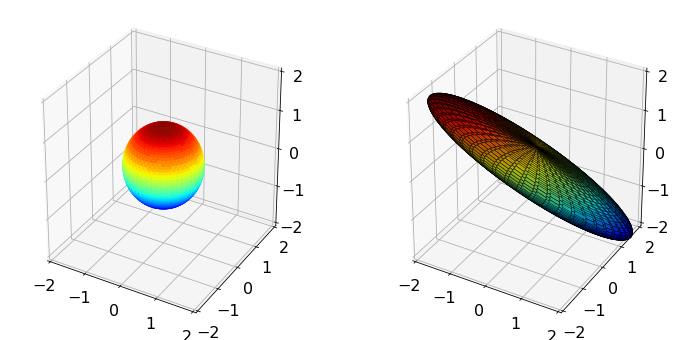

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size':16})

while(True):
    dimensiune = int(input("Introduceti dimensiunea n a matricei:"))
    
    if (dimensiune == 2):
        # Cazul n = 2
        # Cercul unitate
        R = 1 # raza
        t = np.linspace(0, 2*np.pi,100)
        x=R*np.cos(t)
        y=R*np.sin(t)
        
        
        # Elipsa
        a = 0.5
        b=2
        x2 = a*np.cos(t)
        y2 = b* np.sin(t)
        xR = x2*np.cos(np.pi)+y2*np.sin(np.pi/2)
        yR = x2*np.sin(np.pi/2)+y2*np.cos(np.pi)
        
        # Afisarea figurilor
        fig = plt.figure()
        
        ax1 = fig.add_subplot(121)
        ax1.set_xlim(-3, 3)
        ax1.set_ylim(-3, 3)
        ax1.plot(x, y)
        
        ax2 = fig.add_subplot(122)
        ax2.set_xlim(-3,3)
        ax2.set_ylim(-3,3)
        ax2.plot(xR, yR)
        
        plt.show()
    
        break
    
    
    elif dimensiune == 3:
        # Cazul n = 3
        plt.rcParams['figure.figsize'] = [12, 6]
        plt.rcParams.update({'font.size':16})
        
        theta = np.array([np.pi/15, -np.pi/9, -np.pi])
        Sigma = np.diag([3, 1, 0.5])
        
        # Rotatie pentru axa x
        Rx = np.array([[1, 0, 0],
        	      [0, np.cos(theta[0]), -np.sin(theta[0])],
        	      [0, np.sin(theta[0]), np.cos(theta[0])]])
        	      
        #Rotatie pentru axa y
        Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])],
        	       [0, 1, 0],
        	       [-np.sin(theta[1]), 0, np.cos(theta[1])]])
        	       
        #Rotatie pentru axa z
        Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
        	       [np.sin(theta[2]), np.cos(theta[2]), 0],
        	       [0, 0, 1]])
        	       
        #Rotatia respectiv scalarea pentru x y z
        X = Rz @ Ry @ Rx @ Sigma
        U, S, VT = np.linalg.svd(X, full_matrices = False)
        X = U @ np.diag(S)
        
        #Plotarea sferei:
        fig = plt.figure()
        axl = fig.add_subplot(121, projection='3d')
        
        u = np.linspace(0, 2*np.pi, 100)
        v = np.linspace(0, 2*np.pi, 100)
        
        x = np.outer(np.cos(u), np.sin(v))
        y = np.outer(np.sin(u), np.sin(v))
        z = np.outer(np.ones(np.size(u)), np.cos(v))
        
        
        #Plotarea pentru 'suprafata' de rotatie:
        surf1 = axl.plot_surface(x, y, z, cmap='jet')
        axl.set_xlim3d(-2, 2)
        axl.set_ylim3d(-2, 2)
        axl.set_zlim3d(-2, 2)
        
        xR = np.zeros_like(x)
        yR = np.zeros_like(y)
        zR = np.zeros_like(z)
        
        for i in range(x.shape[0]):
        	for j in range(x.shape[1]):
        		vec = [x[i, j], y[i, j], z[i, j]]
        		vecR = X @ vec
        		xR[i, j] = vecR[0]
        		yR[i, j] = vecR[1]
        		zR[i, j] = vecR[2]
        		
        ax2 = fig.add_subplot(122, projection='3d')
        surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet', alpha=0.6)
        surf2.set_edgecolor('k')
        ax2.set_xlim3d(-2, 2)
        ax2.set_ylim3d(-2, 2)
        ax2.set_zlim3d(-2, 2)
        plt.show
        
        break
    
    else: print("Dimensiunea poate fi doar n = 2 sau n = 3")










